## Subsidence - wap

In [10]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import seaborn as sns

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [11]:
import os
import sys
home = os.path.expanduser("~") + '/Documents'
sys.path.insert(0, '{}/phd/functions'.format(home))
from myFuncs import *

### one dataset

In [29]:
variable = 'wap'

data_options= [
    'wap'
    ]

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    # 'bcc-csm1-1',   # 4 no wao rcp
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13 no wap data
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data
    ]

models_cmip6 = [     
    # 'TaiESM1',        # 1
    # 'BCC-CSM2-MR',    # 2
    # 'FGOALS-g3',      # 3
    # 'CNRM-CM6-1',     # 4
    # 'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    # 'NorESM2-MM',     # 7
    # 'GFDL-CM4',       # 8
    # 'CanESM5',        # 9
    # 'CMCC-ESM2',      # 10
    # 'UKESM1-0-LL',    # 11
    # 'MRI-ESM2-0',     # 12
    # 'CESM2',          # 13
    # 'NESM3'           # 14
    ]

datasets = models_cmip5 + models_cmip6

resolutions = [
    'orig',
    # 'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85',
    # 'abrupt-4xCO2'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:wap, dataset:MPI-ESM1-2-HR, experiment:historical, resolution:orig


<xarray.Dataset>
Dimensions:  (time: 10957, plev: 8, lat: 74, lon: 384)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -34.13 -33.19 -32.26 -31.32 ... 32.26 33.19 34.13
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Data variables:
    wap      (time, plev, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-HR output prepared for CMIP6
    variable_id:            wap
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/493e10a2-6a12-41af-8223-4206f4ee34c3

In [13]:
data = ds[variable].sel(plev=500e2)
data

<xarray.DataArray 'wap' (time: 10957, lat: 74, lon: 384)>
[311354112 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
    plev     float64 5e+04
  * lat      (lat) float64 -34.13 -33.19 -32.26 -31.32 ... 32.26 33.19 34.13
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    units:    hPa day⁻¹

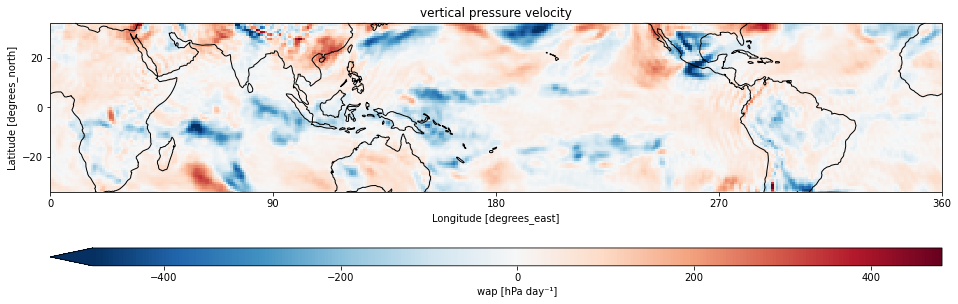

In [14]:
scene = data.isel(time=0)
cmap = 'RdBu_r'
title = 'vertical pressure velocity'
vmin = -np.max(scene)
vmax = np.max(scene)
plot_scene(scene, cmap = cmap, title = title, vmin = vmin, vmax = vmax)

In [15]:
# scene = get_dsvariable('precip', datasets[0],experiments[0],home, resolutions[0])['precip'].isel(time=0)
# conv_threshold = get_metric('prPercentiles', datasets[0], experiments[0])['pr97'].mean(dim=('time'))

# lat = scene.lat
# lon = scene.lon
# lonm,latm = np.meshgrid(lon,lat)

# obj = skm.label(scene.where(scene>=conv_threshold,0)>0, background=np.nan,connectivity=2)
# obj = (obj>0)*1
# labelMatrix = xr.DataArray(
#     data=obj,
#     dims=['lat', 'lon'],
#     coords={'lat': scene.lat.data, 'lon': scene.lon.data}
#     )
# obj = labelMatrix.where(labelMatrix>0)


# fig= plt.figure(figsize=(17.5,8))
# ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

# ax.add_feature(cartopy.feature.COASTLINE)
# ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

# pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues') #, vmin=10, vmax=50)
# ax.pcolormesh(lonm,latm, obj,transform=cartopy.crs.PlateCarree(), cmap='Greys_r')

# ax.set_title(datasets[0] + ': number of objects (black), ' + str(scene.coords['time'].values)[:11] )
# ax.set_xlabel('longitude')
# ax.set_ylabel('latitude')

# ax.set_yticks([-20, 0, 20])
# ax.set_xticks([-180, -90, 0, 90, 180])
# ax.set_xticklabels([0, 90, 180, 270, 360])

# plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'precip' + ' [mm/day]')
# plt.show()

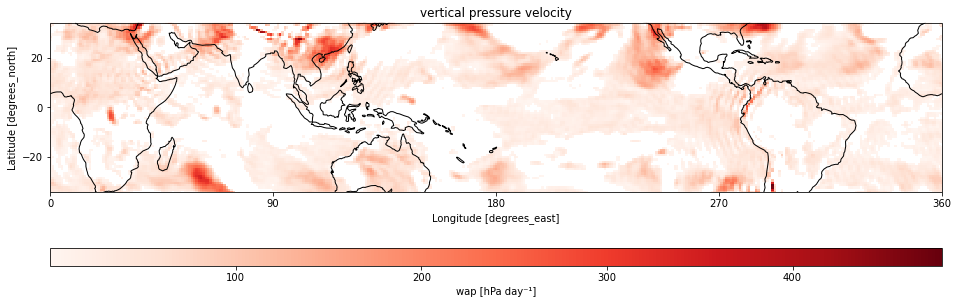

In [16]:
wap_d = True
wap_a = False

if wap_d:
    data = data.where(data>0)
    scene = data.isel(time=0)
    cmap = 'Reds'
    title = 'vertical pressure velocity'
    plot_scene(scene, cmap = cmap, title = title)


if wap_a:
    data = data.where(data<0)
    scene = data.isel(time=0)
    cmap = 'Blues_r'
    title = 'vertical pressure velocity'
    plot_scene(scene, cmap = cmap, title = title)

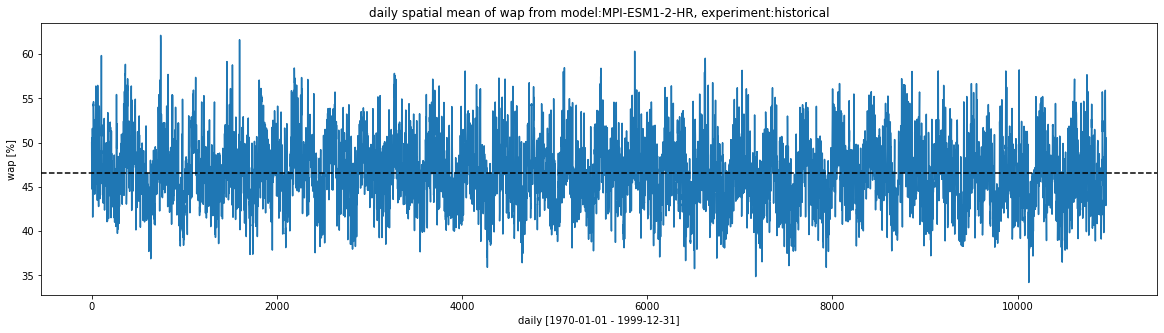

In [17]:
timeMean_options = [
    # 'annual',
    # 'monthly',
    'daily'
    ]

aWeights = np.cos(np.deg2rad(data.lat))
y = data.weighted(aWeights).mean(dim=('lat','lon')) 
y = resample_timeMean(y, timeMean_options[0])
title = '{} spatial mean of {} from model:{}, experiment:{}'.format(timeMean_options[0], data_options[0], datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format(data_options[0], '%')


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

### comparing datasets

In [33]:
variable = 'wap'

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # # 'GISS-E2-H',    # 3 no wap data
    # 'bcc-csm1-1',   # 4 no wao rcp
    # 'CNRM-CM5',     # 5
    # # 'CCSM4',        # 6 no wap data
    # # 'HadGEM2-AO',   # 7 no wap data
    # 'BNU-ESM',      # 8
    # # 'EC-EARTH',     # 9 no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # # 'inmcm4',       # 13 no wap data
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # # 'CESM1-BGC'     # 19 no wap data
    ]


models_cmip6 = [     
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    'CESM2',          # 13
    'NESM3'           # 14
    ]

datasets = models_cmip5 + models_cmip6

resolutions = [
    'orig',
    # 'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85',
    # 'abrupt-4xCO2'
    ]

wap_d = True

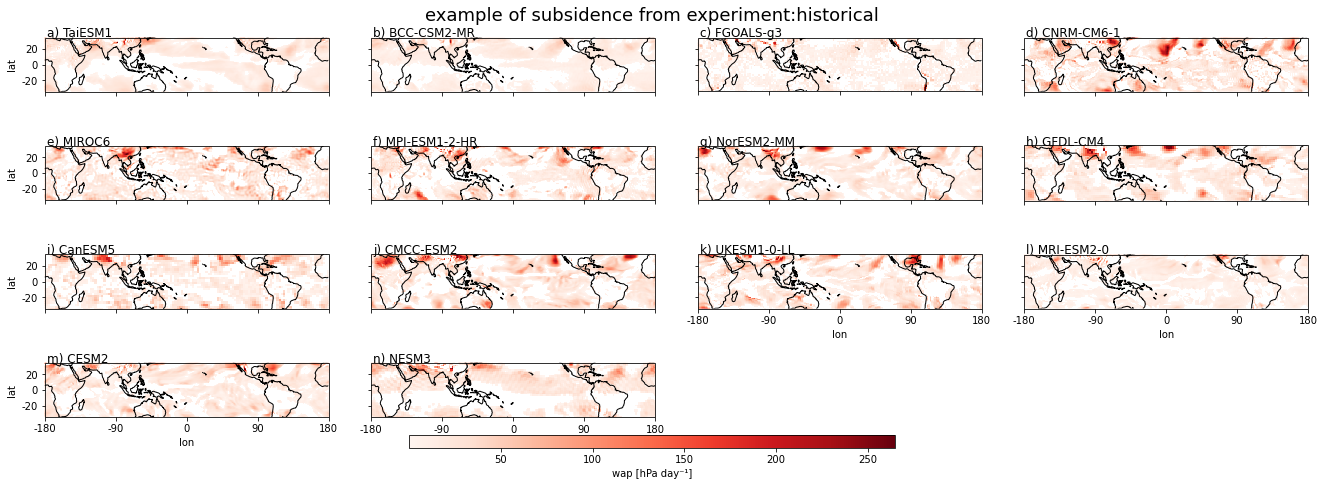

In [26]:
common_limit = False
quantile_low = 0
quantile_high = 0.80
if common_limit:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].isel(time=0).sel(plev = 500e2)
        
        if wap_d:
            wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].isel(time=0).sel(plev = 500e2)
            data = data.where(wap500>0, np.nan)
        
        y = data
        
        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'example of {} from experiment:{}'.format('subsidence', experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.75)
for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(4,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].isel(time=0).sel(plev = 500e2)
    
    if wap_d:
        wap500 = get_dsvariable('wap', dataset, experiments[0], resolution=resolutions[0])['wap'].isel(time=0).sel(plev = 500e2)
        data = data.where(wap500>0, np.nan)

    y = data

    cmap = 'Reds'
    pcm = plot_scene(y, cmap=cmap, zorder=0, ax=ax, vmin=vmin, vmax=vmax)
    
    
    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.825)

cbar_ax = fig.add_axes([0.425, 0.4, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('wap', 'hPa day' + chr(0x207B) + chr(0x00B9)))

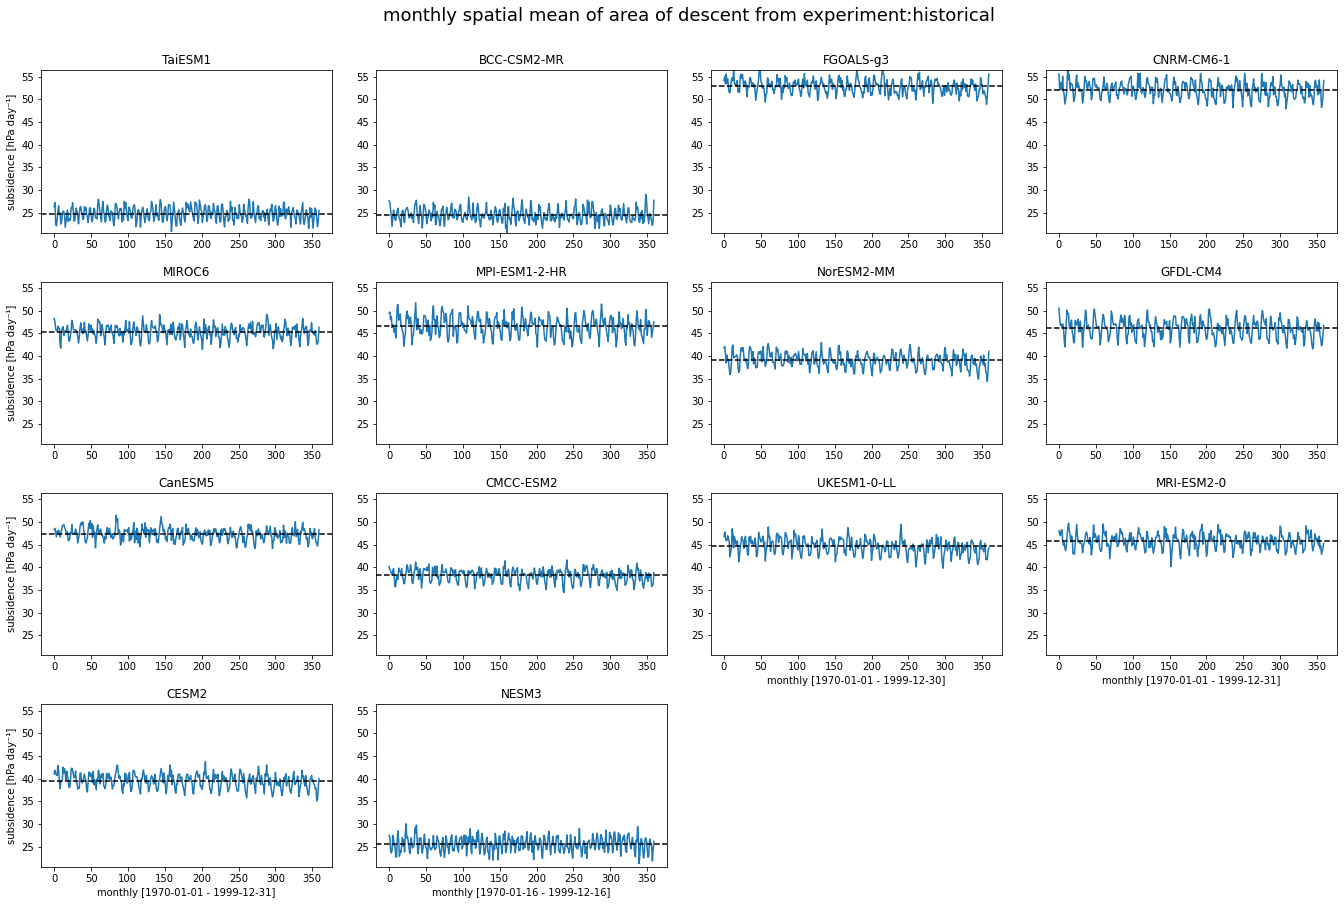

In [28]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

common_limit = True
quantile_low = 0
quantile_high = 0.99
if common_limit:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 500e2)
        data = data.where(data>0)
        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('lat','lon')) 
        y = resample_timeMean(y, timeMean_options[0])

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} spatial mean of {} from experiment:{}'.format(timeMean_options[0], 'area of descent', experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 500e2)
    data = data.where(data>0)
    aWeights = np.cos(np.deg2rad(data.lat))
    y = data.weighted(aWeights).mean(dim=('lat','lon')) 
    y = resample_timeMean(y, timeMean_options[0])

    title = dataset
    plot_timeseries(y, timeMean_option=timeMean_options[0], title=title, ax=ax, ymin=vmin, ymax=vmax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
        plt.xlabel(xlabel)

        if timeMean_options[0]=='seasonal':
            plt.legend()

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'subsidence [{}]'.format('hPa day' + chr(0x207B) + chr(0x00B9))
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

Text(0, 0.5, 'subsidence [hPa day⁻¹]')

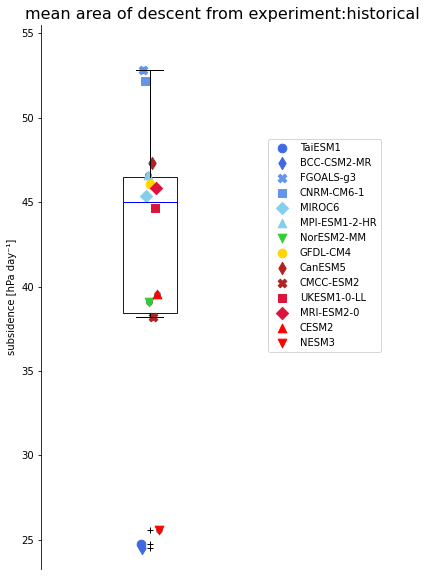

In [34]:
labels_cmip5 =[
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # # 'GISS-E2-H',    # 3 no wap data
    # 'bcc-csm1-1',   # 4 no wao rcp
    # 'CNRM-CM5',     # 5
    # # 'CCSM4',        # 6 no wap data
    # # 'HadGEM2-AO',   # 7 no wap data
    # 'BNU-ESM',      # 8
    # # 'EC-EARTH',     # 9 no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # # 'inmcm4',       # 13 no wap data
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # # 'CESM1-BGC'     # 19 no wap data
    ]

labels_cmip6 = [     
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    'CESM2',          # 13
    'NESM3'           # 14
    ]

labels = labels_cmip5 + labels_cmip6

colors = [
    'red', 'red', 'crimson', 'crimson', 'firebrick', 'firebrick', # red
    'gold', #yellow
    'limegreen', # green
    'skyblue', 'skyblue', 'cornflowerblue', 'cornflowerblue','royalblue', 'royalblue' # blue
    ]
markers = ['o','d','X','s','D', '^','v']

order_by_tas = False
if order_by_tas:
    order_list = []
    for dataset in datasets:
        data = get_metric('tas_tMean', dataset, experiment=experiments[0])['tas_tMean']
        aWeights = np.cos(np.deg2rad(data.lat))
        tas = data.weighted(aWeights).mean(dim=('lat','lon'))
        order_list = np.append(order_list, tas)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()

common_limit = True
quantile_low = 0
quantile_high = 0.99
if common_limit:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 500e2)
        data = data.where(data>0)
        aWeights = np.cos(np.deg2rad(data.lat))
        data = data.weighted(aWeights).mean(dim=('lat','lon')) 
        y = data.mean(dim='time')

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


plt.figure(figsize=(6.5,10))
title = 'mean {} from experiment:{}'.format('area of descent', experiments[0])
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 500e2)
    data = data.where(data>0)
    aWeights = np.cos(np.deg2rad(data.lat))
    data = data.weighted(aWeights).mean(dim=('lat','lon')) 
    y_data = data.mean(dim='time')
    y = np.append(y, y_data)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))
x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    plt.legend(bbox_to_anchor=(0.95,0.8))


plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('subsidence [{}]'.format('hPa day' + chr(0x207B) + chr(0x00B9)))